<a href="https://colab.research.google.com/github/William-Metz/NXTPlaySampleNotebooks/blob/main/FieldSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview
This Notebook was use to fine tuning the field segmentation model. Fining tuning is just training a pretrained model with additional data. All cell after the training section can be ignore but maybe useful if you want to see what the model can do. Any photos for testing can be replaced with any sideline shot from hudl.

# Setup

## Check GPU and setup home directory

In [ ]:
!nvidia-smi
import os
HOME = os.getcwd()

Wed Dec  6 07:08:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installation

In [ ]:
!pip install ultralytics==8.0.134
!pip install roboflow --quiet
!pip install supervision

from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
drive.mount('/content/drive')

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 27.3/166.8 GB disk)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
HOME = os.getcwd()

# Training Pretrained Model on New Data

## Getting Dataset and project

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
from roboflow import Roboflow
rf = Roboflow(api_key="lGuxbuJ8K6SUmiXOUY1I")
project = rf.workspace("field-detection-vsidj").project("football-2-wdhlf")
dataset = project.version(3).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.134, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-2-3 in yolov8:: 100%|██████████| 1986/1986 [00:00<00:00, 3307.54it/s]


In [ ]:

%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=1600 batch=8

/content
New https://pypi.org/project/ultralytics/8.0.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/football-2-3/data.yaml, epochs=100, patience=50, batch=8, imgsz=1600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augme

/content


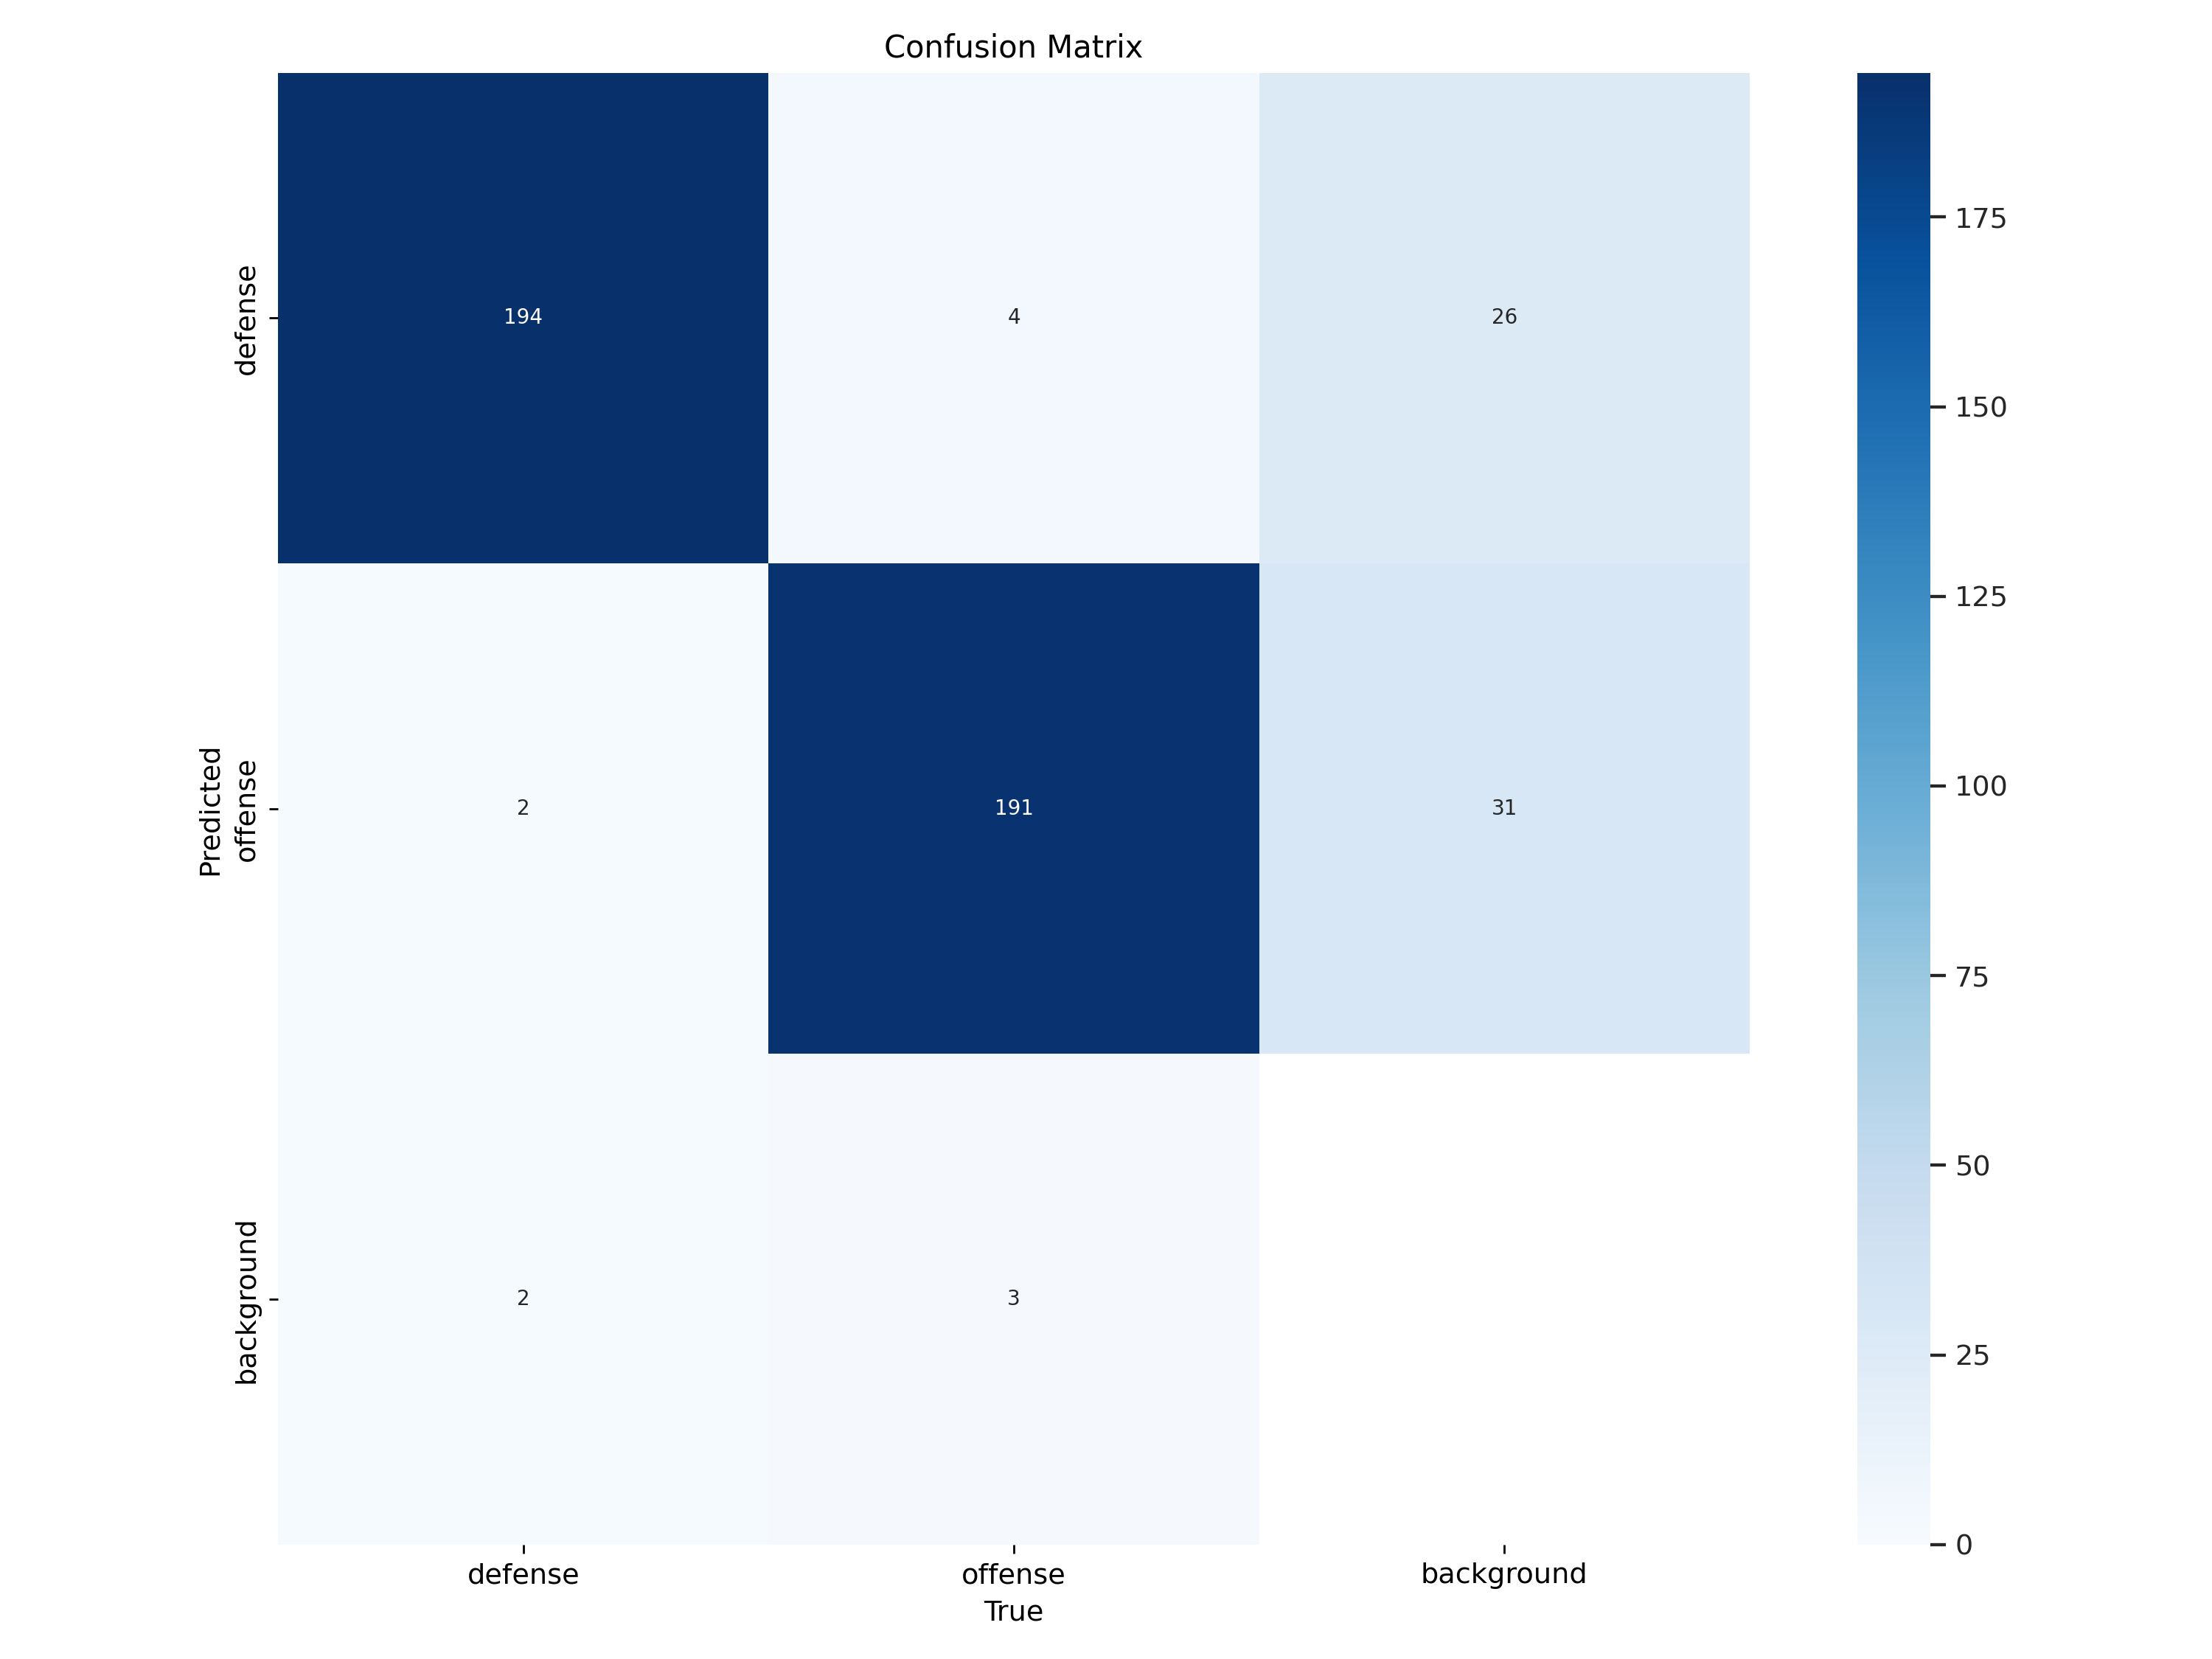

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/confusion_matrix.png', width=600)

/content


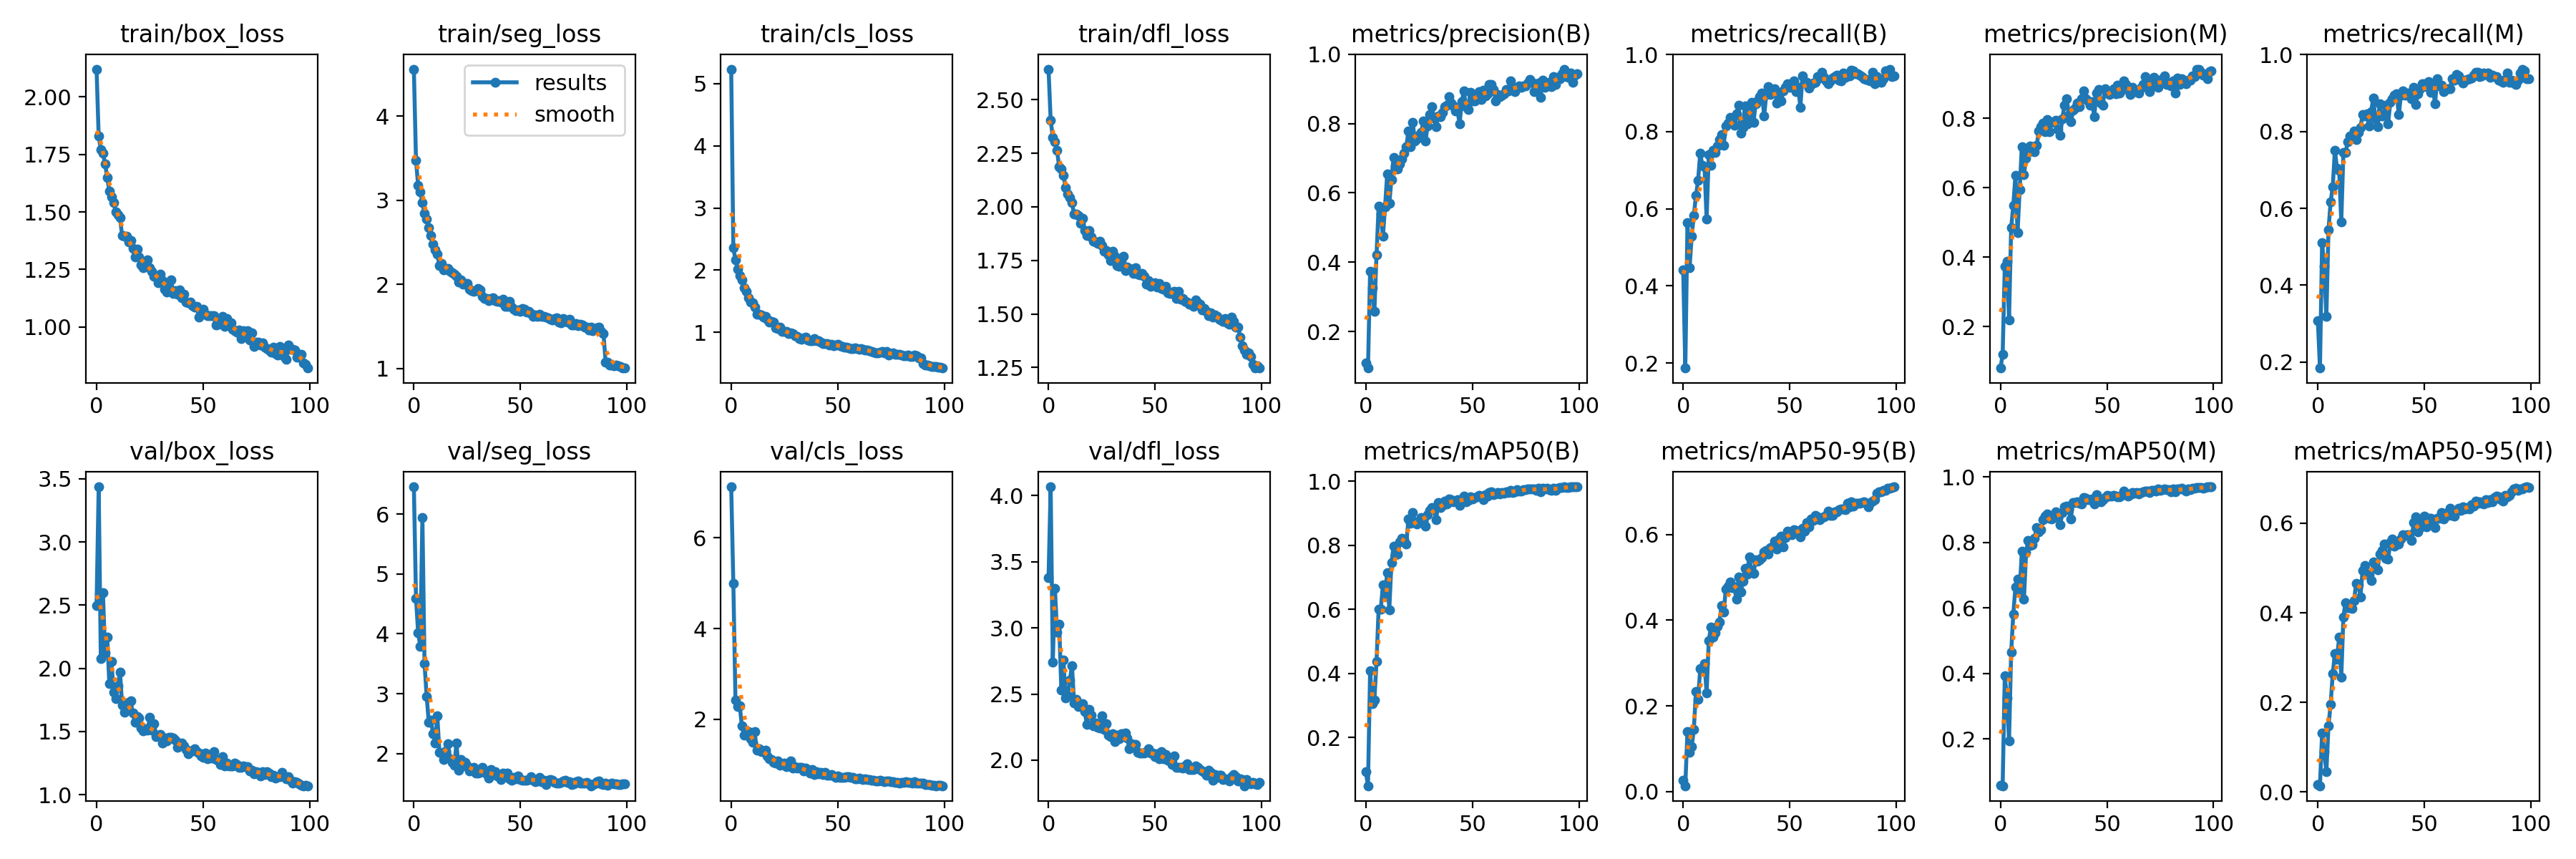

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/results.png', width=600)

/content


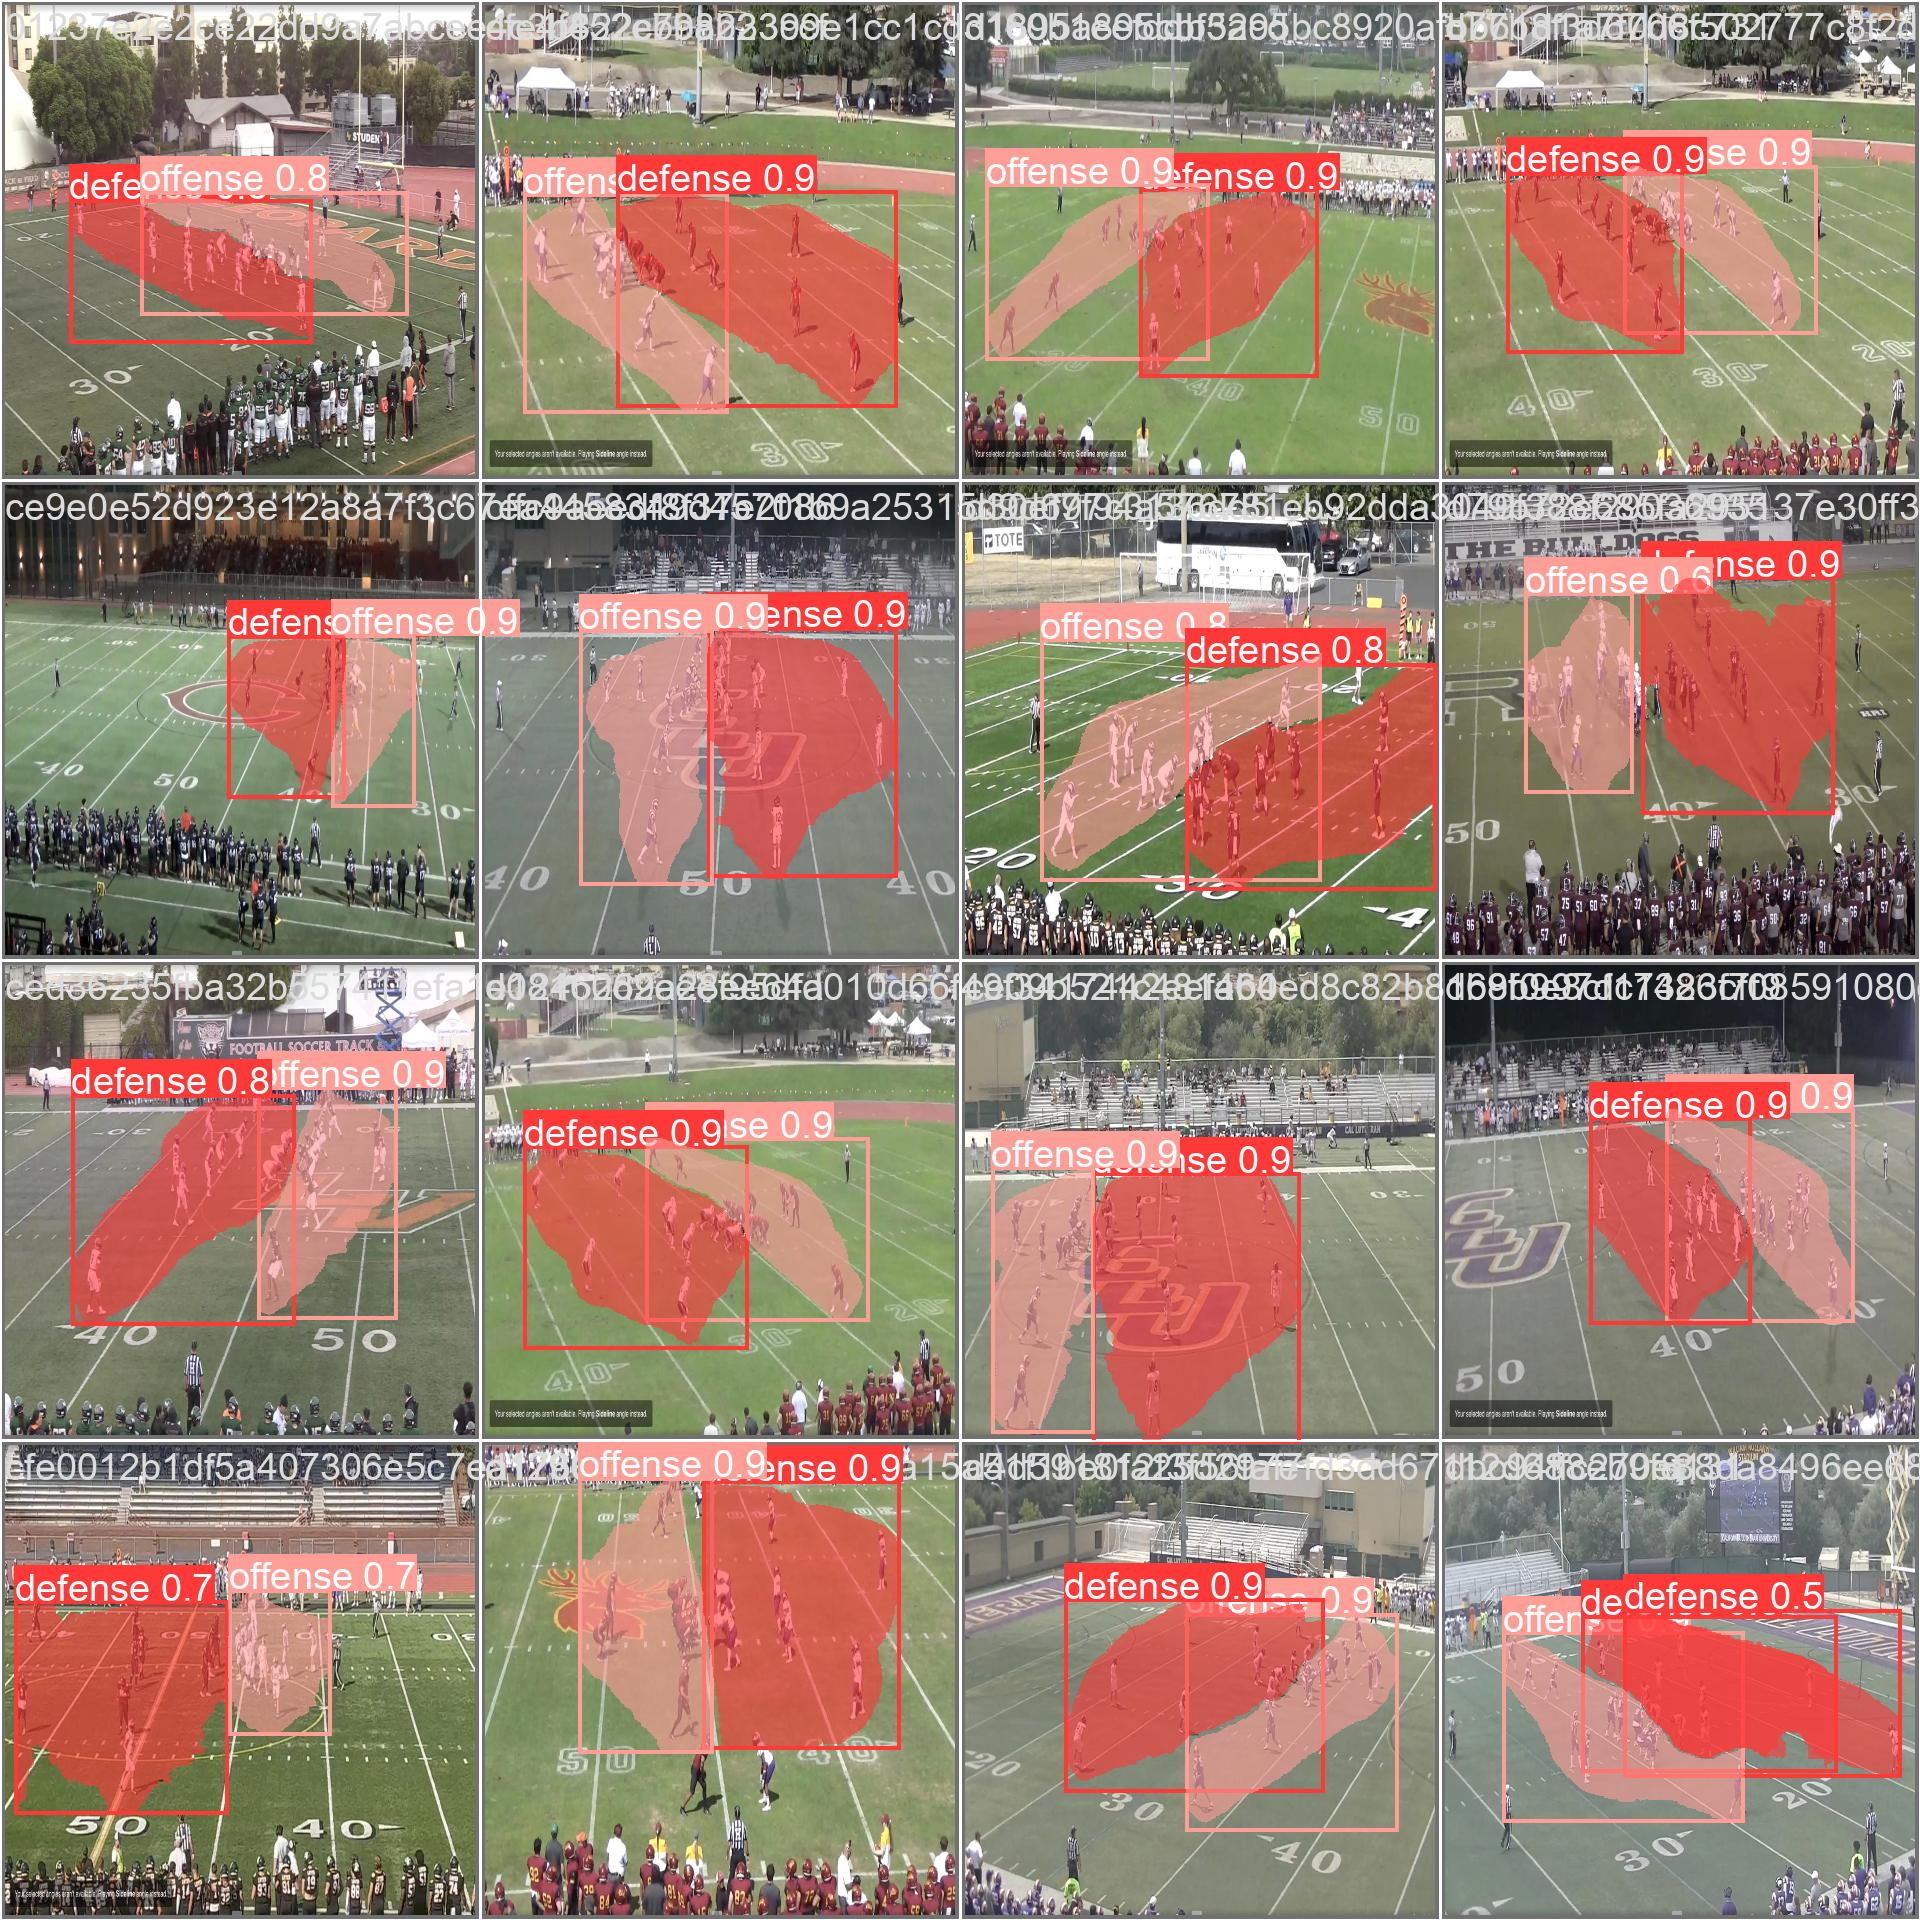

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/val_batch0_pred.jpg', width=600)

## Validate Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train4/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-06 08:16:14.921631: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 08:16:14.921693: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 08:16:14.921721: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients
val: Scanning /content/datasets/football-2-3/valid/labels.cache... 198 images, 0 backgrounds, 0 corrupt: 100% 198/198 [00:00<?, ?it/s]
                 Class     Images  Instances

## Inference Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-12-06 08:18:14.388851: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 08:18:14.388908: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 08:18:14.388935: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients

image 1/98 /content/datasets/football-2-3/test/images/055853396443f7924f4199c6e0ec56a76839d49f3c4630e8f87ac9df1273fba4_png.rf.2fa95b5527903320a667f8b1a4452800.jpg: 1600x1600 1 de

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

# Using Model


In [ ]:
model = YOLO(f'{HOME}/runs/segment/train2/weights/best.pt')
model.task = "segment"

## Image

In [ ]:
import matplotlib.pyplot as plt

image_path = "/content/drive/My Drive/MidtermProject/img2.jpg"
image = cv2.imread(image_path)

# Run YOLOv8 inference on the image
results = model(image,conf=.6)

# Visualize the results on the image
annotated_image = results[0].plot()

# Convert BGR to RGB (OpenCV loads images in BGR format)
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the annotated image using matplotlib
plt.imshow(annotated_image_rgb)
plt.axis('off')  # Hide the axes
plt.show()


## Video

In [ ]:
video_path = "/content/drive/My Drive/MidtermProject/test1.mp4"
cap = cv2.VideoCapture(video_path)


# Define the video writer
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('output.mp4', fourcc, 59.83, (int(cap.get(3)), int(cap.get(4))))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

         # Write the frame to the output video
        out.write(annotated_frame)

        # Display the annotated frame
      #  cv2.imshow("YOLOv8 Inference", annotated_frame)


    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object, video writer and close the display window
cap.release()
out.release()

## Use this for players not image segmentation

In [ ]:
import supervision as sv
import numpy as np
from ultralytics import YOLO
import cv2

VIDEO_PATH = "/content/drive/My Drive/MidtermProject/test1.mp4"

model = YOLO(f'{HOME}/runs/segment/train/weights/best.pt')
model =YOLO("yolov8n-seg.pt")
results = model("/content/drive/My Drive/MidtermProject/photo154.png")
print(results)
video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

In [ ]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_ultralytics(results)

    box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

    #labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections)

    return frame
sv.process_video(source_path=VIDEO_PATH, target_path=f"result1.mp4", callback=process_frame)
